# Dataset Splitting

## Import libraries

In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import the data

In [174]:
df = pd.read_csv("housing (1).csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [144]:
df.shape

(20640, 10)

## Method 1 : Using Train Test split 

In [145]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [146]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

## Method 2 : Manuallly by creating a function

In [147]:
def split_data(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [148]:
train_set_1, test_set_1 = split_data(df, test_ratio=0.2)

In [149]:
train_set_1.shape,test_set_1.shape

((16512, 10), (4128, 10))

## Method 3 : Stratified Sampling

In [150]:
# Create bins
df['income_cat'] = np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat']< 5, 5.0, inplace = True)

In [151]:
# Stratified Split
from sklearn.model_selection import  StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_idx, test_idx in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_idx]
    strat_test_set = df.loc[test_idx]

In [152]:
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [153]:
df['income_cat'].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [154]:
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

## Task 1: Prove Stratification Actually Worked

In [155]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts(normalize=True).sort_index()

In [156]:
st_comp =  pd.DataFrame({"full_dataset" : income_cat_proportions(df),
"st_train" : income_cat_proportions(strat_train_set),
"st_test" : income_cat_proportions(strat_test_set)})

In [157]:
st_comp.head()

,full_dataset,st_train,st_test
1.0,0.039826,0.039789,0.039971
2.0,0.318847,0.318859,0.318798
3.0,0.350581,0.350594,0.350533
4.0,0.176308,0.176296,0.176357
5.0,0.114438,0.114462,0.114341


In [158]:
if full_dataset.shape==st_test.shape==st_train.shape:
    print("Stratified Worked .")

Stratified Worked .


<AxesSubplot:>

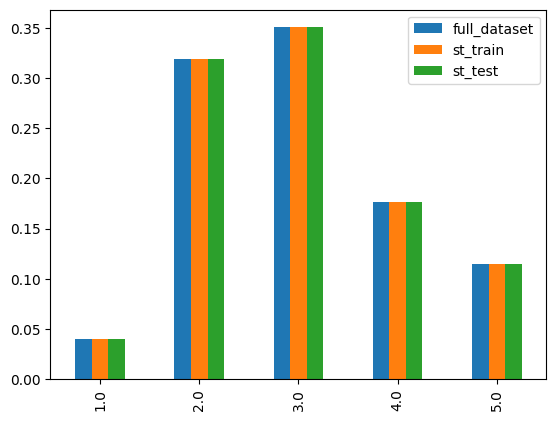

In [159]:
st_comp.plot(kind='bar')

## Task 2: Compare Random Split vs Stratified Split

In [160]:
rand_train_set, rand_test_set = train_test_split( df, test_size=0.2, random_state=42) 

In [161]:
rand_train_val = income_cat_proportions(rand_train_set)
rand_test_val = income_cat_proportions(rand_test_set)

In [162]:
st_rand_comp = pd.DataFrame({
    'full_dataset' : full_dataset,
    'rand_train_val' : rand_train_val,
    'rand_test_val' : rand_test_val,
    'st_train_val' : st_train,
    'st_test_val' : st_test
})

In [163]:
st_rand_comp

,full_dataset,rand_train_val,rand_test_val,st_train_val,st_test_val
1.0,0.039826,0.039729,0.040213,0.039789,0.039971
2.0,0.318847,0.317466,0.324370,0.318859,0.318798
3.0,0.350581,0.348595,0.358527,0.350594,0.350533
4.0,0.176308,0.178537,0.167393,0.176296,0.176357
5.0,0.114438,0.115673,0.109496,0.114462,0.114341


<AxesSubplot:>

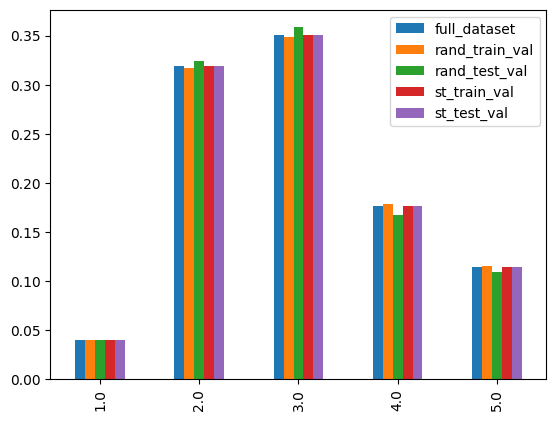

In [164]:
st_rand_comp.plot(kind = 'bar')

## Task 3: Intentionally Break It

In [165]:
# Create fake bins
df_bad = df.copy()

df_bad['target_cat']= pd.cut(
    df_bad['median_house_value'],
    bins=5
)

In [166]:
# Stratified split on TARGET
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_idx, test_idx in split.split(df_bad, df_bad['target_cat']):
    bad_train = df_bad.loc[train_idx]
    bad_test = df_bad.loc[test_idx]

In [167]:
bad_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,target_cat
19582,-120.76,37.65,25.0,3214.0,682.0,2319.0,640.0,2.0385,84300.0,INLAND,2.0,"(14513.998, 111999.4]"
15537,-117.11,33.12,46.0,52.0,13.0,59.0,13.0,3.8750,200000.0,<1H OCEAN,3.0,"(111999.4, 208999.8]"
6027,-117.74,34.06,48.0,2438.0,599.0,1508.0,548.0,2.8983,129200.0,INLAND,2.0,"(111999.4, 208999.8]"
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN,3.0,"(111999.4, 208999.8]"
1578,-122.03,37.87,21.0,3521.0,447.0,1396.0,467.0,8.2673,358700.0,NEAR BAY,5.0,"(306000.2, 403000.6]"


In [168]:
bad_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,target_cat
17363,-120.42,34.95,52.0,1391.0,287.0,632.0,276.0,1.7431,131500.0,<1H OCEAN,2.0,"(111999.4, 208999.8]"
1678,-122.32,38.06,4.0,7999.0,1611.0,3596.0,1396.0,5.0969,174200.0,NEAR BAY,4.0,"(111999.4, 208999.8]"
9750,-121.69,36.62,19.0,1907.0,323.0,681.0,270.0,6.0332,244900.0,<1H OCEAN,5.0,"(208999.8, 306000.2]"
19092,-122.62,38.24,19.0,1687.0,253.0,893.0,257.0,6.2040,201800.0,<1H OCEAN,5.0,"(111999.4, 208999.8]"
3264,-123.07,39.12,24.0,1098.0,193.0,353.0,145.0,3.8333,92600.0,<1H OCEAN,3.0,"(14513.998, 111999.4]"


In [204]:
print(df_bad['target_cat'].value_counts(normalize=True))
print("\n",bad_train['target_cat'].value_counts(normalize=True))
print("\n",bad_test['target_cat'].value_counts(normalize=True))

(111999.4, 208999.8]     0.381298
(208999.8, 306000.2]     0.221318
(14513.998, 111999.4]    0.217490
(306000.2, 403000.6]     0.096463
(403000.6, 500001.0]     0.083430
Name: target_cat, dtype: float64

 (111999.4, 208999.8]     0.381298
(208999.8, 306000.2]     0.221294
(14513.998, 111999.4]    0.217478
(306000.2, 403000.6]     0.096475
(403000.6, 500001.0]     0.083454
Name: target_cat, dtype: float64

 (111999.4, 208999.8]     0.381298
(208999.8, 306000.2]     0.221415
(14513.998, 111999.4]    0.217539
(306000.2, 403000.6]     0.096415
(403000.6, 500001.0]     0.083333
Name: target_cat, dtype: float64


## Task 4: Hash-Based Split

In [170]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [175]:
# Step 1 : Create a stable ID
# df = df.reset_index() if no index exists

In [176]:
df['idx'] = df['longitude']* 1000 +df['latitude']

In [177]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,idx
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [196]:
# Hash-Based Split using Index-ID
import hashlib

def is_test_set(identifier, test_ratio, hash = hashlib.md5):
    return int(hash(np.int64(identifier)).hexdigest(), 16)< test_ratio* 2**128
    

In [197]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : is_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [198]:
train_set_2, test_set_2 = split_train_test_by_id(
    df, test_ratio=0.2, id_column='idx'
)

In [199]:
train_set_2.shape

(16810, 11)

In [200]:
test_set.shape

(3830, 11)

In [202]:
train_1, test_1 = split_train_test_by_id(df, 0.2, "idx")
train_2, test_2 = split_train_test_by_id(df, 0.2, "idx")

(train_1.index == train_2.index).all()
(test_1.index == test_2.index).all()


True

## Day 10 — Identifying Weak vs Strong Features (Stratification Context)

### Core Definition
- A **strong feature** is one where changes in the feature cause **consistent, significant changes in the target distribution**.
- A **weak feature** is one whose distribution can change **without meaningfully affecting the target distribution**.

---

### Why Weak Features Matter
- Stratification only preserves the distribution of the feature you stratify on.
- Stratifying on a weak feature gives **false confidence**.
- Target distribution can still drift → biased evaluation.

---

### How to Identify Strong vs Weak Features (NO MODELS)

#### 1. Target Variance Across Feature Bins (Best Method)
- Bin the feature.
- Compare target statistics (mean/median) across bins.
- Large differences → strong feature.
- Similar values across bins → weak feature.

Example:
```pythonpython
df.groupby('feature_bin')['target'].mean()




## Day 10 — Hash-Based Train/Test Split (Deterministic & Stable)

### Why Hash-Based Splitting
- Random splits change when the dataset grows or is reloaded.
- Hash-based splitting assigns each row to train or test **deterministically**.
- The same row will always go to the same set, even if new data is added later.

---

### Step 1: Create a Stable Row Identifier

    df['idx'] = df['longitude'] * 1000 + df['latitude']


### Step 2: Decide Whether a Row Belongs to the Test Set

    def is_test_set(identifier, test_ratio, hash=hashlib.md5):
    return int(hash(np.int64(identifier)).hexdigest(), 16) < test_ratio * 2**128 ```


Hashes the row ID using MD5 (deterministic).
Converts the hash to a large integer.
Maps it into a fixed range and checks if it falls within the test ratio.
Same ID → same hash → same split forever.



### Step 3: Split Dataset Using the Hashed ID
 
    def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


Applies the hash test to every row ID.
Rows flagged True go to the test set.
Remaining rows go to the training set.
No randomness involved.

### Step 4: Perform the Stable Split
    train_set_2, test_set_2 = split_train_test_by_id(
        df, test_ratio=0.2, id_column='idx'
    )


Creates a stable 80/20 split.
Adding or removing rows will not move existing rows between sets.```python